In [1]:
%matplotlib inline

import math as m
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

yellow='#ffb200'
red='#DD5544'
blue='#0284C0'

In [2]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [3]:
folder = r'C:\SPRUP_data_Jenda\2020_09_25_Jenda_prism_grating\20_10_5_L3/'.replace('\\', '/')
folder = r'C:\SPRUP_data_Jenda\2020_10_06_callibration/'.replace('\\', '/')

name = 'calibration_curve'

In [6]:
with open(folder + name +'.txt') as f:
    loadfile = f.read()
    data = []
for lf in loadfile.split('\n')[:-1]:
    row = [float(j) for j in lf.split('\t')]
    data.append([row[0]] + row[1::2])

data = np.matrix(data)

with open(folder + name +'Log.txt') as f:
    loadfile = f.read()
    columns = [lf[11:-6] for lf in loadfile.split('\n')[:-1]]
    columns = ['wavelength [nm]']+ columns[1::2]

TypeError: object of type 'builtin_function_or_method' has no len()

In [13]:
data = data[:500,:]

In [14]:
area1 = 1920*1200*5.86**2
area2 = 782*582*8.3**2

In [15]:
# data[:,2]*=0.67

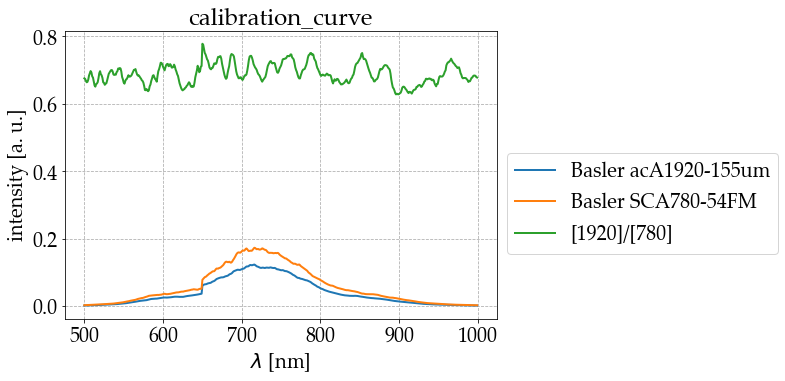

In [16]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.grid(linestyle='--')
axes.set_title(name)
axes.set_xlabel('$\\lambda$ [nm]')
axes.set_ylabel('intensity [a. u.]')

for i in range(1, data.shape[1]):
    axes.plot(data[:,0], data[:,i], linewidth=2, label = columns[i])

lgd = fig.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

fig.savefig(folder + name +'.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    


In [17]:
np.average(data[:,3])

0.689896522